In [49]:
import pandas as pd
import glob

In [50]:
results_dir = "./hackathon_data/results_{experiment}/combined_results.csv"

base_df =pd.read_csv(results_dir.format(experiment="base"))
base_df

,datapoint_id,type,top1_rmsd,top5_mean_rmsd,top5_min_rmsd,rmsd_under_2A,rmsd_model_0,rmsd_model_1,rmsd_model_2,rmsd_model_3,rmsd_model_4
0,2E9N_ORTHOSTERIC_76A,orthosteric,0.760044,1.030617,0.760044,True,0.760044,0.975848,1.032121,1.205795,1.179278
1,3F9N_ALLOSTERIC_38M,allosteric,20.807214,20.537179,19.857755,False,20.807214,20.619286,20.652038,19.857755,20.749600
2,5MO4_ORTHOSTERIC_NIL,orthosteric,0.814705,0.781066,0.649372,True,0.814705,0.775890,0.861556,0.803805,0.649372
3,3PYY_ALLOSTERIC_3YY,allosteric,23.680409,23.742151,23.601049,False,23.680409,23.808660,23.601049,23.897219,23.723420
4,5MO4_ALLOSTERIC_AY7,allosteric,1.430370,1.110210,0.921085,True,1.430370,0.927802,1.192317,0.921085,1.079473
5,3K5V_ORTHOSTERIC_STI,orthosteric,0.448643,0.427660,0.359449,True,0.448643,0.425032,0.523756,0.359449,0.381420
6,3K5V_ALLOSTERIC_STJ,allosteric,25.262033,25.249092,25.152867,False,25.262033,25.441190,25.188876,25.200495,25.152867
7,1JQH_ORTHOSTERIC_ANP,orthosteric,1.373161,1.536832,1.312038,True,1.373161,1.510930,1.312038,1.699471,1.788561
8,3I81_ORTHOSTERIC_EBI,orthosteric,0.761249,0.531686,0.443231,True,0.761249,0.483874,0.469738,0.443231,0.500337
9,3LW0_ALLOSTERIC_CCX,allosteric,2.037556,2.375002,2.037556,False,2.037556,2.148004,2.419831,2.385680,2.883942


In [51]:
# Check the data structure and top1_rmsd statistics
print("Shape:", base_df.shape)
print("\nColumns:", base_df.columns.tolist())
print("\nTop1_RMSD statistics:")
print(base_df['top1_rmsd'].describe())

Shape: (40, 11)

Columns: ['datapoint_id', 'type', 'top1_rmsd', 'top5_mean_rmsd', 'top5_min_rmsd', 'rmsd_under_2A', 'rmsd_model_0', 'rmsd_model_1', 'rmsd_model_2', 'rmsd_model_3', 'rmsd_model_4']

Top1_RMSD statistics:
count    40.000000
mean      5.946274
std       8.793131
min       0.165125
25%       0.570249
50%       1.314493
75%       6.437945
max      27.501084
Name: top1_rmsd, dtype: float64


In [52]:
# Categorize systems based on top1_rmsd
# Using common RMSD thresholds in structural biology:
# - Easy: RMSD < 2Å (high quality prediction)
# - Moderate: 2Å ≤ RMSD < 5Å (reasonable prediction)
# - Hard: RMSD ≥ 5Å (low quality prediction)

def categorize_rmsd(rmsd):
    if rmsd < 2.0:
        return 'Easy'
    elif rmsd < 5.0:
        return 'Moderate'
    else:
        return 'Hard'

base_df['quality_category'] = base_df['top1_rmsd'].apply(categorize_rmsd)

# Display the distribution
print("Category Distribution:")
print(base_df['quality_category'].value_counts().sort_index())

Category Distribution:
quality_category
Easy        23
Hard        11
Moderate     6
Name: count, dtype: int64


In [53]:
# Display the dataframe with categories
base_df[['datapoint_id', 'type', 'top1_rmsd', 'quality_category']].sort_values('top1_rmsd')

,datapoint_id,type,top1_rmsd,quality_category
15,2PIO_ORTHOSTERIC_DHT,orthosteric,0.165125,Easy
27,4YPQ_ALLOSTERIC_4F1,allosteric,0.311939,Easy
29,2GM1_ALLOSTERIC_2AZ,allosteric,0.320252,Easy
28,3ZCW_ORTHOSTERIC_ADP,orthosteric,0.349608,Easy
23,1V4S_ALLOSTERIC_MRK,allosteric,0.371182,Easy
13,1YV3_ALLOSTERIC_BIT,allosteric,0.388649,Easy
26,5APH_ORTHOSTERIC_VYI,orthosteric,0.420535,Easy
36,3BZ3_ORTHOSTERIC_YAM,orthosteric,0.435517,Easy
5,3K5V_ORTHOSTERIC_STI,orthosteric,0.448643,Easy
20,3MVH_ORTHOSTERIC_WFE,orthosteric,0.560278,Easy


In [54]:
all_experiments =glob.glob("./hackathon_data/results*/combined_results.csv")

In [55]:
# Load all experiments and add the quality categories from base
import re

# Get the datapoint_id to category mapping from base
base_categories = base_df[['datapoint_id', 'quality_category']].set_index('datapoint_id')['quality_category']

# Load all experiments
experiments_data = []

for exp_path in all_experiments:
    # Extract experiment name from path
    exp_name = re.search(r'results_([^/]+)/', exp_path).group(1)
    
    # Load the data
    df = pd.read_csv(exp_path)
    
    # Add quality category based on base experiment
    df['quality_category'] = df['datapoint_id'].map(base_categories)
    
    # Calculate overall mean top1_rmsd
    overall_mean = df['top1_rmsd'].mean()
    
    # Calculate mean top1_rmsd per category
    category_means = df.groupby('quality_category')['top1_rmsd'].mean()
    
    experiments_data.append({
        'experiment': exp_name,
        'overall_mean_rmsd': overall_mean,
        'easy_mean_rmsd': category_means.get('Easy', None),
        'moderate_mean_rmsd': category_means.get('Moderate', None),
        'hard_mean_rmsd': category_means.get('Hard', None),
        'dataframe': df
    })

# Create summary dataframe
summary_df = pd.DataFrame([
    {
        'experiment': exp['experiment'],
        'overall_mean_rmsd': exp['overall_mean_rmsd'],
        'easy_mean_rmsd': exp['easy_mean_rmsd'],
        'moderate_mean_rmsd': exp['moderate_mean_rmsd'],
        'hard_mean_rmsd': exp['hard_mean_rmsd']
    }
    for exp in experiments_data
])

# Sort by overall mean RMSD (lower is better)
summary_df = summary_df.sort_values('overall_mean_rmsd')

print("=" * 80)
print("EXPERIMENT COMPARISON - Mean top1_rmsd (lower is better)")
print("=" * 80)
summary_df

EXPERIMENT COMPARISON - Mean top1_rmsd (lower is better)


,experiment,overall_mean_rmsd,easy_mean_rmsd,moderate_mean_rmsd,hard_mean_rmsd
16,final_mock,4.734847,1.772699,2.273692,12.270876
7,samples_50_msasubsample,4.812103,1.908944,2.313710,12.245107
8,samples_50,4.823400,1.751001,2.672181,12.420898
15,final_mock_original,5.194510,1.763061,9.278898,10.141509
12,samples_50_affinity,5.881526,0.708849,2.775954,18.391072
0,base,5.946274,0.715460,2.685442,18.662065
1,samples_5_msasubsample,6.037345,0.719715,2.743608,18.952608
9,samples_25_rc1,6.202936,0.664040,2.599740,19.749642
5,samples_5_affinity,6.221181,0.732806,6.214899,17.700301
10,samples_25,6.260927,0.746696,2.829347,19.662453


In [56]:
# Show detailed comparison with improvement over base
base_overall = summary_df[summary_df['experiment'] == 'base']['overall_mean_rmsd'].values[0]

summary_df['improvement_vs_base'] = base_overall - summary_df['overall_mean_rmsd']
summary_df['improvement_pct'] = (summary_df['improvement_vs_base'] / base_overall * 100)

print("\nDETAILED RESULTS (sorted by overall performance):")
print("-" * 100)
summary_df.sort_values('overall_mean_rmsd')[['experiment', 'overall_mean_rmsd', 'improvement_vs_base', 'improvement_pct']]


DETAILED RESULTS (sorted by overall performance):
----------------------------------------------------------------------------------------------------


,experiment,overall_mean_rmsd,improvement_vs_base,improvement_pct
16,final_mock,4.734847,1.211427,20.372873
7,samples_50_msasubsample,4.812103,1.134170,19.073628
8,samples_50,4.823400,1.122874,18.883659
15,final_mock_original,5.194510,0.751764,12.642606
12,samples_50_affinity,5.881526,0.064748,1.088876
0,base,5.946274,0.000000,0.000000
1,samples_5_msasubsample,6.037345,-0.091071,-1.531569
9,samples_25_rc1,6.202936,-0.256662,-4.316354
5,samples_5_affinity,6.221181,-0.274907,-4.623187
10,samples_25,6.260927,-0.314653,-5.291605


BEST EXPERIMENT COMPARISON


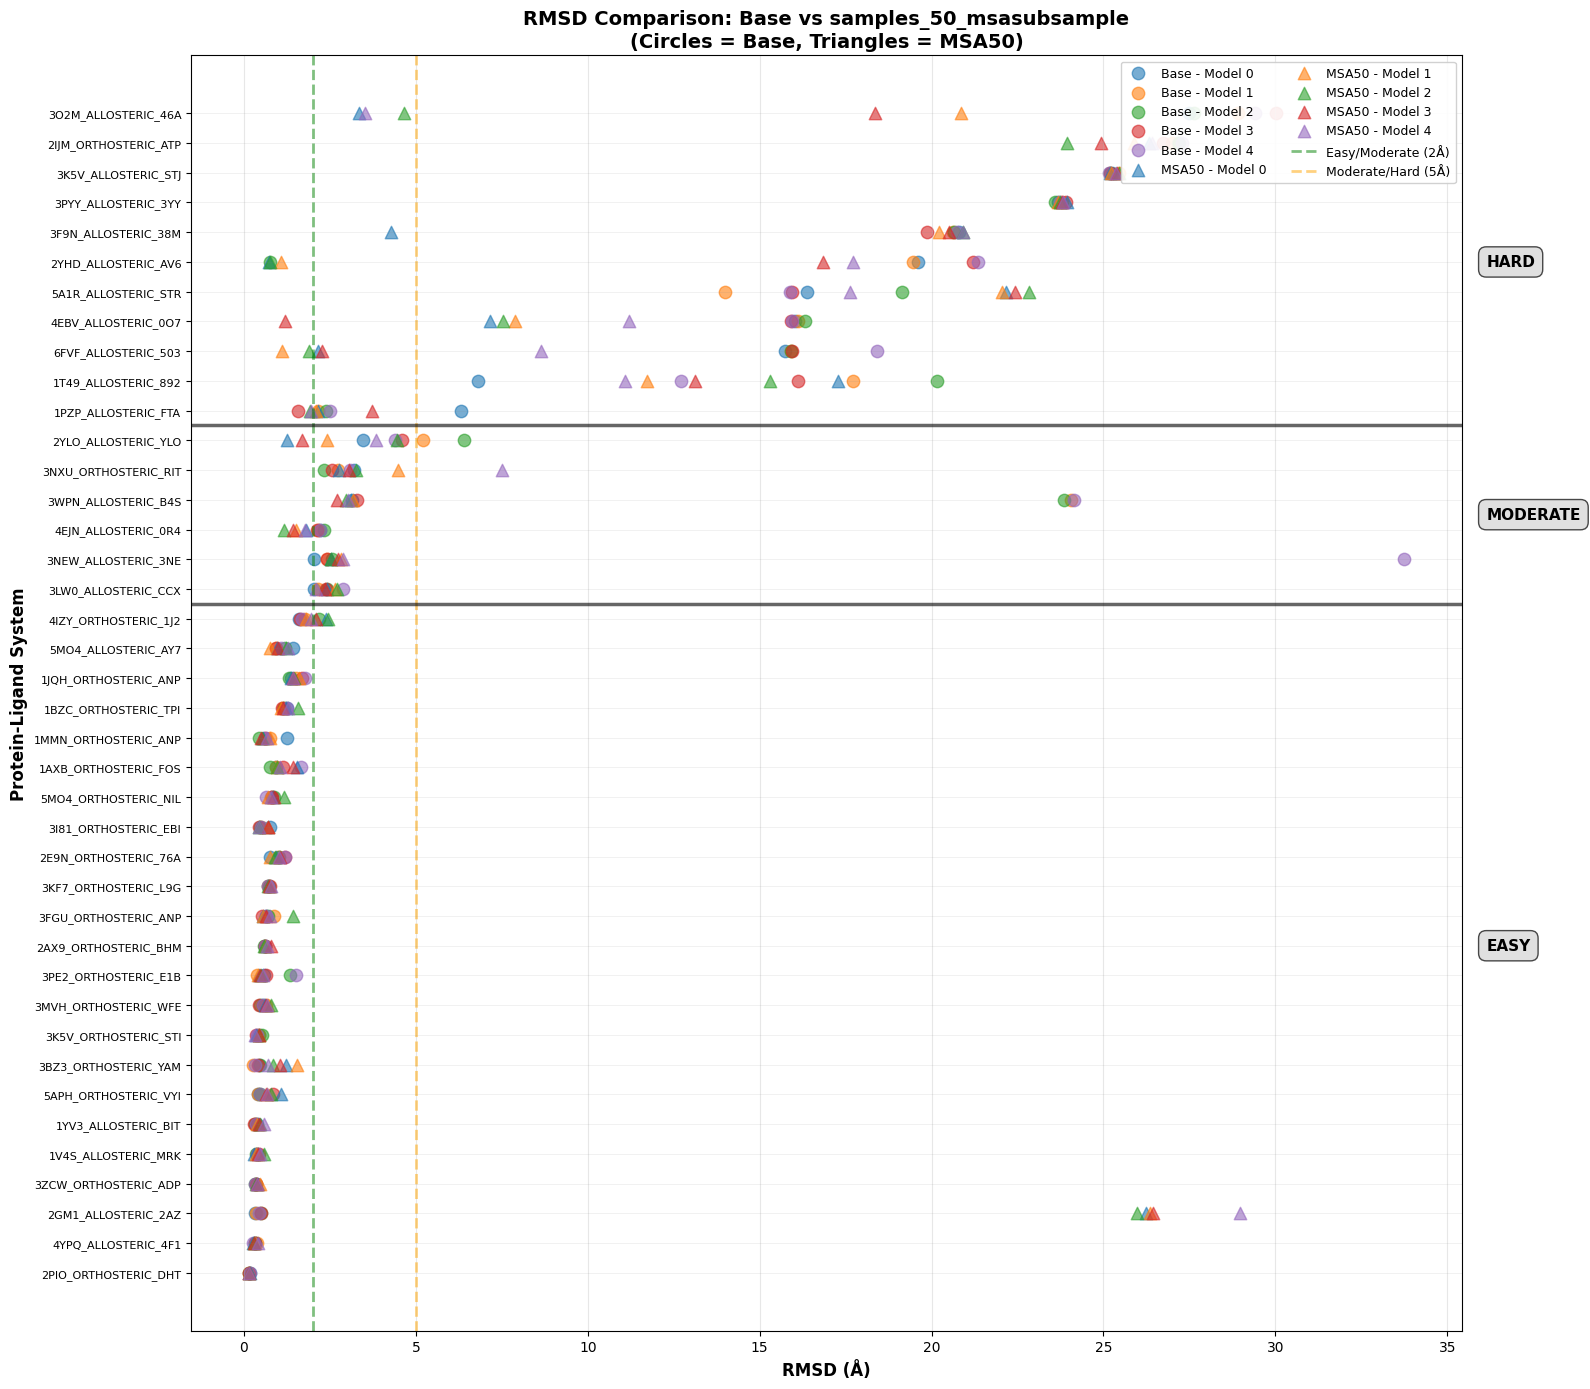

Circles = Base experiment | Triangles = samples_50_msasubsample experiment
Systems are sorted by base experiment's top1_rmsd (best to worst)
Thick horizontal lines separate Easy/Moderate/Hard categories
Vertical lines indicate category thresholds: Green=2Å, Orange=5Å



In [57]:
import matplotlib.pyplot as plt
import numpy as np

def plot_experiment_comparison(base_data, comparison_data, comparison_name, short_name):
    """
    Create a comparison plot between base experiment and another experiment.
    
    Parameters:
    - base_data: DataFrame for base experiment
    - comparison_data: DataFrame for comparison experiment
    - comparison_name: Full name of comparison experiment (for title)
    - short_name: Short name for legend (e.g., 'MSA50', 'LigQuad')
    """
    # Note: The columns are rmsd_model_0 through rmsd_model_4 (5 models total, 0-indexed)
    model_cols = ['rmsd_model_0', 'rmsd_model_1', 'rmsd_model_2', 'rmsd_model_3', 'rmsd_model_4']
    
    # Sort by base experiment's top1_rmsd for consistent ordering
    base_data_sorted = base_data.sort_values('top1_rmsd')
    system_order = base_data_sorted['datapoint_id'].tolist()
    
    # Create single plot with both experiments
    fig, ax = plt.subplots(figsize=(16, 14))
    
    y_positions = np.arange(len(system_order))
    
    # Define colors for models
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    # Plot base experiment (circles)
    base_sorted = base_data_sorted.set_index('datapoint_id').loc[system_order]
    for i, model_col in enumerate(model_cols):
        ax.scatter(base_sorted[model_col], y_positions, alpha=0.6, s=80, 
                   color=colors[i], marker='o', label=f'Base - Model {i}')
    
    # Plot comparison experiment (triangles)
    comp_sorted = comparison_data.set_index('datapoint_id').loc[system_order].reset_index()
    for i, model_col in enumerate(model_cols):
        ax.scatter(comp_sorted[model_col], y_positions, alpha=0.6, s=80, 
                   color=colors[i], marker='^', label=f'{short_name} - Model {i}')
    
    # Formatting
    ax.set_yticks(y_positions)
    ax.set_yticklabels(system_order, fontsize=8)
    ax.set_xlabel('RMSD (Å)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Protein-Ligand System', fontsize=12, fontweight='bold')
    ax.set_title(f'RMSD Comparison: Base vs {comparison_name}\n(Circles = Base, Triangles = {short_name})', 
                 fontsize=14, fontweight='bold')
    
    # Add threshold lines
    ax.axvline(x=2, color='green', linestyle='--', alpha=0.5, linewidth=2, label='Easy/Moderate (2Å)')
    ax.axvline(x=5, color='orange', linestyle='--', alpha=0.5, linewidth=2, label='Moderate/Hard (5Å)')
    
    # Legend with two columns
    ax.legend(loc='upper right', ncol=2, fontsize=9, framealpha=0.9)
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add horizontal grid lines to separate systems
    for y in y_positions:
        ax.axhline(y=y, color='gray', linestyle='-', alpha=0.15, linewidth=0.5)
    
    # Add horizontal separators for category boundaries
    # Find the boundaries between Easy, Moderate, and Hard categories
    base_sorted_with_cat = base_data_sorted.reset_index(drop=True)
    category_changes = []
    for i in range(1, len(base_sorted_with_cat)):
        if base_sorted_with_cat.iloc[i]['quality_category'] != base_sorted_with_cat.iloc[i-1]['quality_category']:
            category_changes.append(i - 0.5)
    
    for boundary_y in category_changes:
        ax.axhline(y=boundary_y, color='black', linestyle='-', alpha=0.6, linewidth=2.5)
    
    # Add category labels on the right side
    category_positions = {}
    for i, row in base_sorted_with_cat.iterrows():
        cat = row['quality_category']
        if cat not in category_positions:
            category_positions[cat] = []
        category_positions[cat].append(i)
    
    for cat, positions in category_positions.items():
        mid_y = np.mean(positions)
        ax.text(ax.get_xlim()[1] * 1.02, mid_y, cat.upper(), 
                verticalalignment='center', fontweight='bold', fontsize=11,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    print(f"Circles = Base experiment | Triangles = {comparison_name} experiment")
    print(f"Systems are sorted by base experiment's top1_rmsd (best to worst)")
    print(f"Thick horizontal lines separate Easy/Moderate/Hard categories")
    print(f"Vertical lines indicate category thresholds: Green=2Å, Orange=5Å")
    print()

# Get the dataframes
base_data = [exp for exp in experiments_data if exp['experiment'] == 'base'][0]['dataframe']
best_data = [exp for exp in experiments_data if exp['experiment'] == 'samples_50_msasubsample'][0]['dataframe']
ligquad_data = [exp for exp in experiments_data if exp['experiment'] == 'samples_5_ligquad'][0]['dataframe']
ligqdup_data = [exp for exp in experiments_data if exp['experiment'] == 'samples_5_ligdup'][0]['dataframe']

# Plot comparison with best experiment
print("=" * 80)
print("BEST EXPERIMENT COMPARISON")
print("=" * 80)
plot_experiment_comparison(base_data, best_data, 'samples_50_msasubsample', 'MSA50')

WORST EXPERIMENT COMPARISON


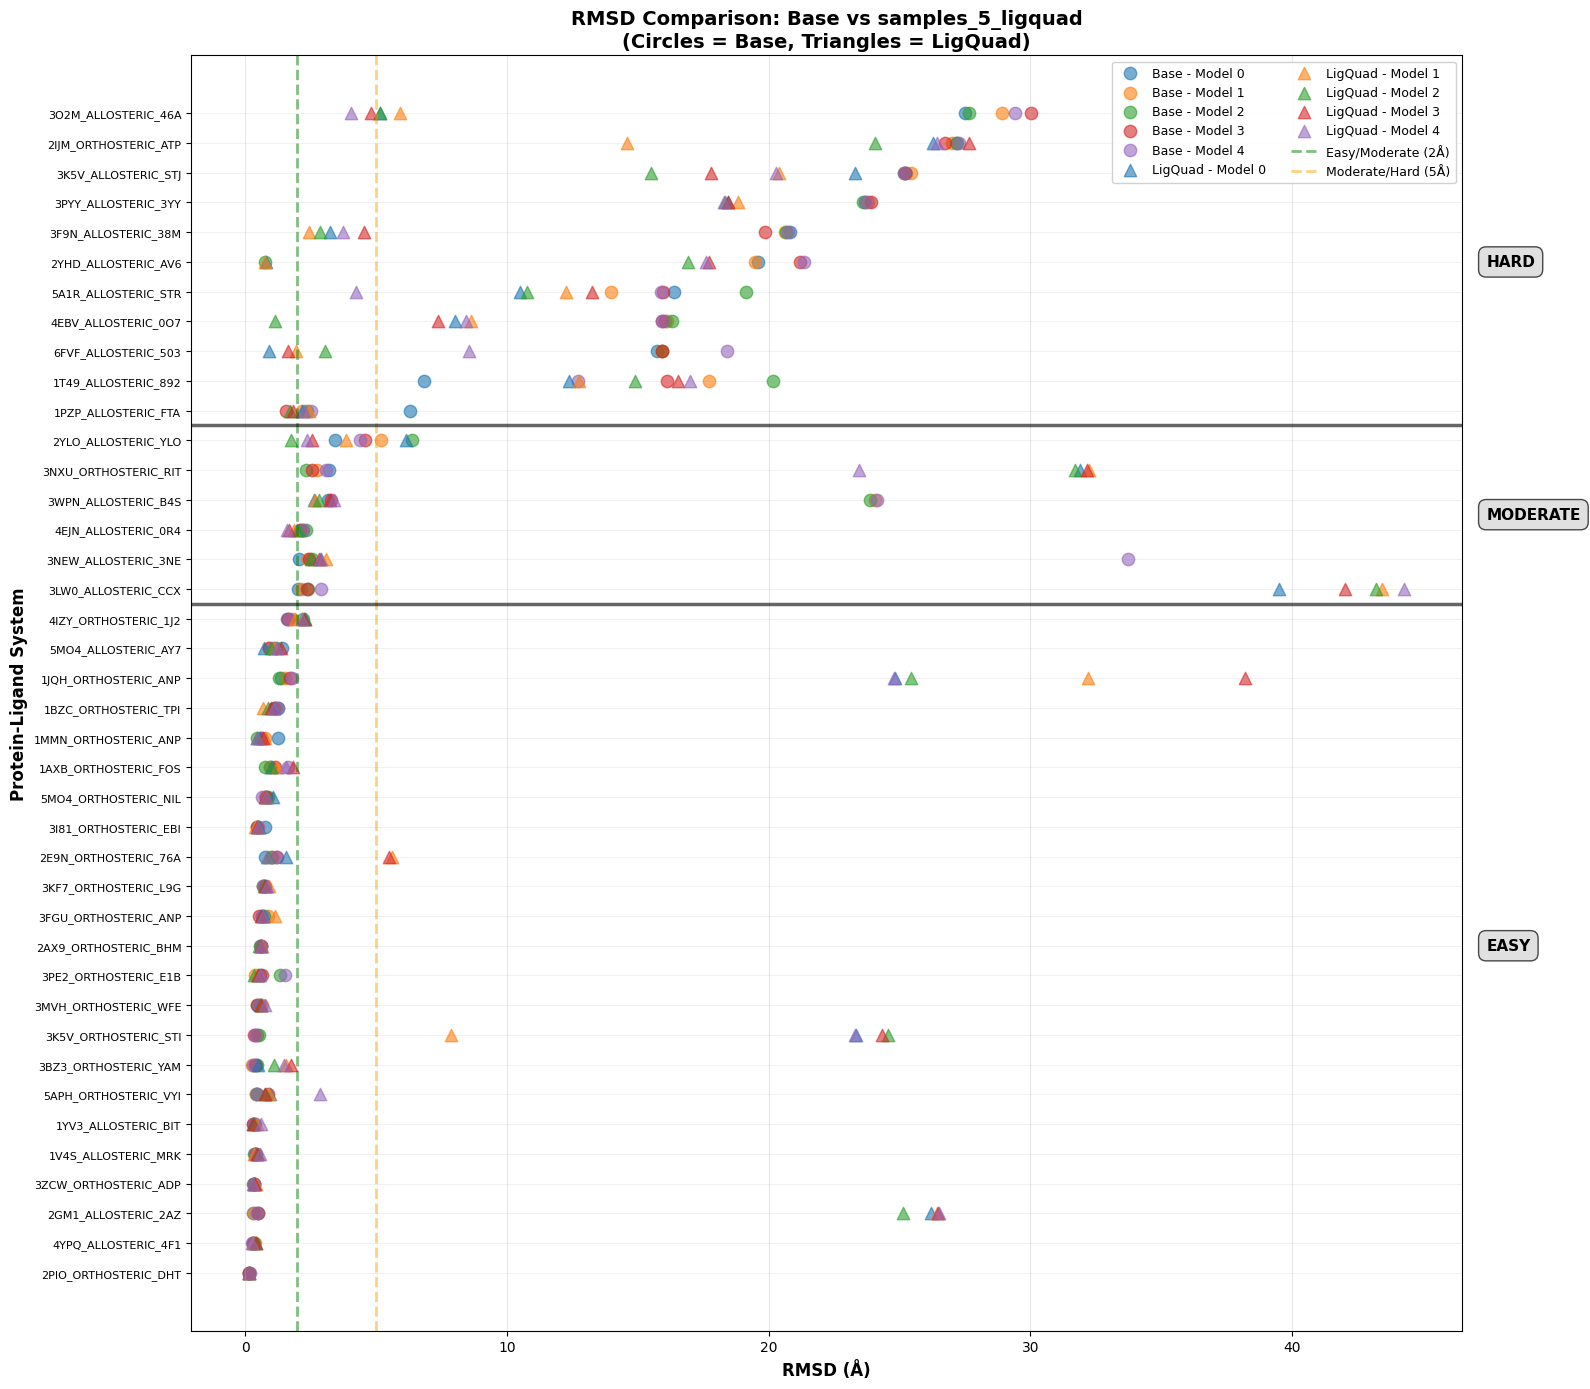

Circles = Base experiment | Triangles = samples_5_ligquad experiment
Systems are sorted by base experiment's top1_rmsd (best to worst)
Thick horizontal lines separate Easy/Moderate/Hard categories
Vertical lines indicate category thresholds: Green=2Å, Orange=5Å



In [58]:
# Plot comparison with worst experiment
print("=" * 80)
print("WORST EXPERIMENT COMPARISON")
print("=" * 80)
plot_experiment_comparison(base_data, ligquad_data, 'samples_5_ligquad', 'LigQuad')